In [ ]:
import urllib.request
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/ingus-t/SPAI/master/resources/Data_Entry_2017.csv")

def download_all_images():
  # URLs for the zip files
  links = [
      'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
      'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
      'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
      'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
      'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
      'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
      'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
      'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
      'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
      'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
      'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
      'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
  ]

  for idx, link in enumerate(links):
      fn = 'images_%02d.tar.gz' % (idx+1)
      print ('downloading', fn, '...')
      urllib.request.urlretrieve(link, fn)  # download the zip file
  print ("Download complete. Please check the checksums")

In [ ]:
# download_all_images()

In [ ]:
# tar -xzvf images_12.tar.gz

# Data cleaning

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ingus-t/SPAI/master/resources/Data_Entry_2017.csv")
df.head(5)

In [ ]:
# create columns with disease name and set 1s and 0s according to finding labesl
diseases = ["No Finding",
            "Infiltration",
            "Atelectasis",
            "Effusion",
            "Nodule",
            "Pneumothorax",
            "Mass",
            "Consolidation",
            "Pleural_Thickening",
            "Cardiomegaly",
            "Emphysema",
            "Fibrosis",
            "Edema",
            "Pneumonia",
            "Hernia"]

#loop on each
for disease in diseases:
  df[disease] = df['Finding Labels'].map(lambda x: 1 if disease in x else 0)
df2 = df.copy()


In [ ]:
df2.drop(df2.columns[[2,3,4,5,6]], axis=1, inplace=True) #3mlt run kaza mara 3lashan ashel ely malosh lazma
df2.head(10)

In [ ]:
df2['vector'] = df2.apply(lambda row: [row[col] for col in diseases], axis=1)
df2.head()

# Image Resizing

In [ ]:
import cv2
import os
import numpy as np

new_dim = (256,256)
images_path = "D:/GAM3A/5-Senior02/GP/1-ChatBot/GP-Chatbot/Dataset/images"
X = []
Y = []
for i, row in df2.iterrows():
  # if i < 60652:
  #   continue
  if(i%10000 == 0):
    print(i,'/',df2.shape[0])
  img = cv2.imread(os.path.join(images_path, df2['Image Index'][i]))
  img = cv2.resize(img,(256,256))
  X.append(img)
  Y.append(df2['vector'][i])


In [ ]:
print(len(X))

In [ ]:
print(X[60651])

In [ ]:
#save the data X and Y
# import pickle

# with open('X_rest.pickle', 'wb') as f:
#     pickle.dump(X, f)
# with open('Y_rest.pickle', 'wb') as f:
#     pickle.dump(Y, f)

# **Start HERE**

In [2]:
# type: ignore
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
#load the data X and Y
# X_1 = pickle.load(open('X_60652.pickle', 'rb'))
X_2 = pickle.load(open('X_rest.pickle', 'rb'))

# Y_1 = pickle.load(open('Y_60652.pickle', 'rb'))
Y_2 = pickle.load(open('Y_rest.pickle', 'rb'))

In [ ]:
print(len(X_2))
print(len(Y_2))

Total (51468, 15)
first Half (6000, 15)
second Half (25734, 15)
TOTAL
[26254 10464  5511  6635  3223  2810  2925  2109  1672  1195  1184   546
  1103   675    81]


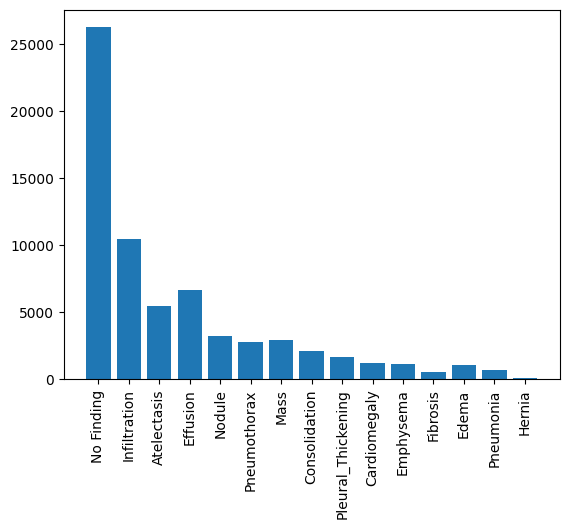

C:\Users\Abdoi\AppData\Local\Temp\ipykernel_10896\4120727645.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels, rotation=90)
C:\Users\Abdoi\AppData\Local\Temp\ipykernel_10896\4120727645.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels, rotation=90)


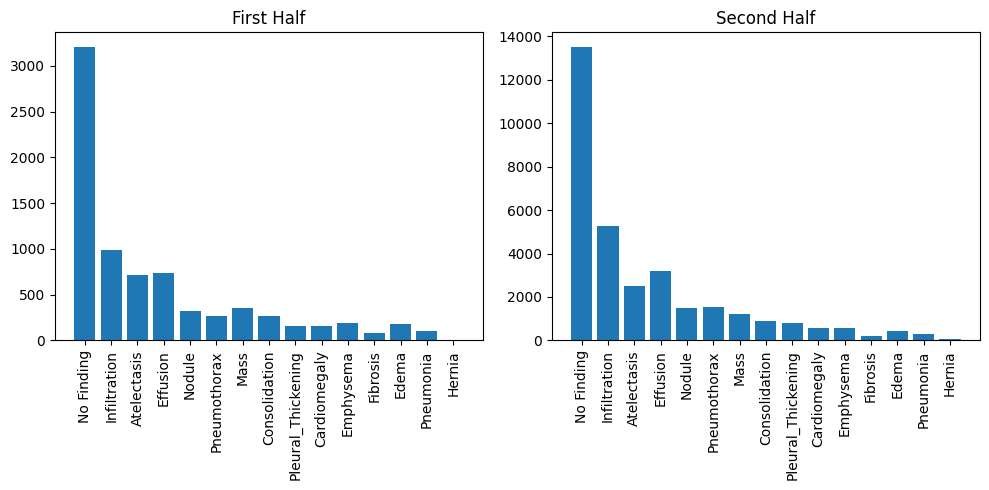

In [5]:
total = np.array(Y_2)
temp = np.array(Y_2[0:6000])
temp2 = np.array(Y_2[25734::])

print("Total",total.shape)
print("first Half",temp.shape)
print("second Half",temp2.shape)

labels = ["No Finding","Infiltration","Atelectasis","Effusion","Nodule","Pneumothorax","Mass","Consolidation","Pleural_Thickening","Cardiomegaly","Emphysema","Fibrosis","Edema","Pneumonia","Hernia"]

label_Total = np.sum(total, axis=0)
label_counts = np.sum(temp, axis=0)
label_counts2 = np.sum(temp2, axis=0)

print("TOTAL")
print(label_Total)
plt.bar(labels, label_Total)
plt.xticks(rotation=90)
plt.show()

# Make as subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

axs[0].title.set_text('First Half')
axs[0].bar(labels, label_counts)
axs[0].set_xticklabels(labels, rotation=90)

axs[1].title.set_text('Second Half')
axs[1].bar(labels, label_counts2)
axs[1].set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()

#show plts horizontally


In [ ]:
X = X_2[0:30000]
Y = Y_2[0:30000]
del X_2
del Y_2

In [ ]:
#data splitting 
#type: ignore
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [ ]:
#start CUDA and convert eveything to tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#get curr device name
print(torch.cuda.get_device_name(0))

In [ ]:
#convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [ ]:
# Convert X and Y to tensor and move to device
X_train = torch.from_numpy(X_train).float().to(device)
X_val = torch.from_numpy(X_val).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)

y_train = torch.from_numpy(y_train).int().to(device)
y_val = torch.from_numpy(y_val).int().to(device)
y_test = torch.from_numpy(y_test).int().to(device)

# CNN building

In [ ]:
#type: ignore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

## train the model


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
#start training on validation data
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
#save the model as pickle
import pickle
with open('./models/model_X2_0_30K_50PERCENT.pickle', 'wb') as f:
    pickle.dump(model, f)